In [56]:

#This comment is to add the code to my branch

import pandas as pd

import os  # Import os to work with environment variables

# Combine the directory with the filename
file_path = os.path.join("./", "superstore.csv")

# Load the dataset
df = pd.read_csv(file_path, encoding='latin1')

# Replace spaces with underscores, convert to lowercase, remove hyphens and strip extra whitespaces
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower().str.strip()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info (Before Cleaning):")
print(df.info())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicate rows
df = df.drop_duplicates()

# Check for missing values **(but do not fill them)**
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Convert columns to correct data types
date_columns = ['order_date', 'ship_date']  # Modify if needed
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop columns that are useless for analysis (modify this list as needed)
columns_to_drop = ['row_id', 'postal_code','country','order_id','customer_name','product_name']  # Example: Remove identifiers that are not useful
df = df.drop(columns=columns_to_drop, errors='ignore')

# Ensure correct data types
print("\nUpdated Data Types:")
print(df.dtypes)

First 5 rows of the dataset:
   row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     customer_name    segment        country             city  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  sub_category                                       product_na

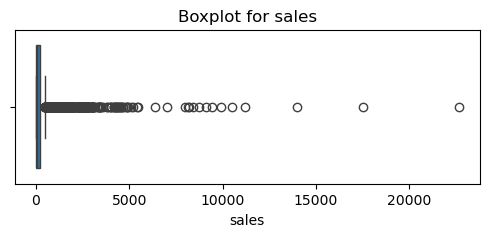

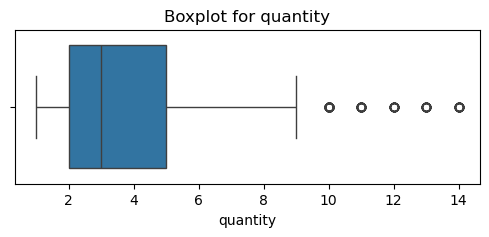

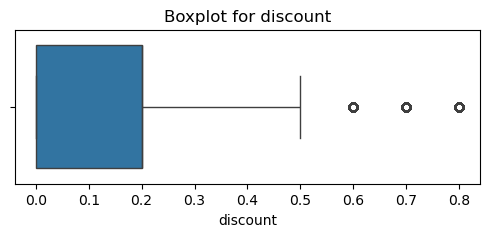

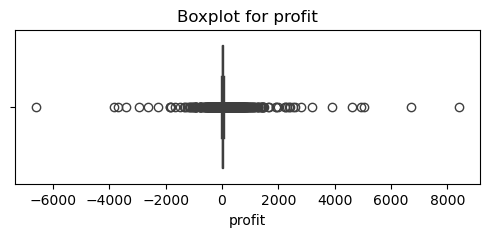

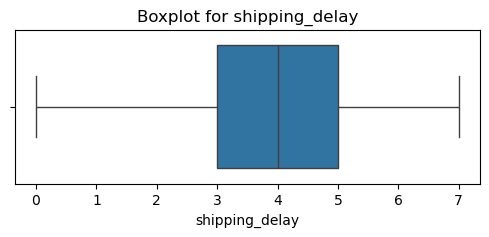

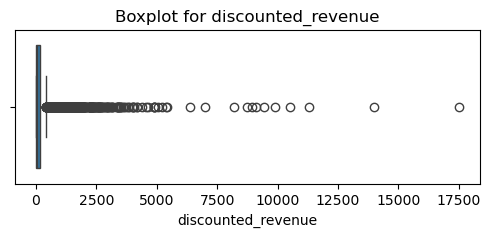

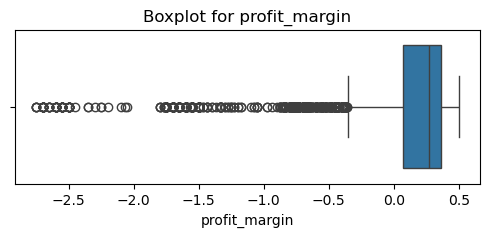

sales: 1167 outliers detected
quantity: 170 outliers detected
discount: 856 outliers detected
profit: 1881 outliers detected
shipping_delay: 0 outliers detected
discounted_revenue: 1154 outliers detected
profit_margin: 952 outliers detected


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot separate boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    plt.title(f'Boxplot for {col}', fontsize=12)
    sns.boxplot(x=df[col])
    plt.show()

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_dict = detect_outliers_iqr(df, numeric_cols)

# Print number of outliers per column
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers detected")

In [52]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_delay,discounted_revenue,profit_margin
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896,3.958175,197.580421,0.120314
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.088800,-2.750000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750,3.000000,14.336000,0.075000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500,4.000000,45.923200,0.270000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,5.000000,180.176475,0.362500
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,7.000000,17499.950000,0.500000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108,1.747567,539.045278,0.466754


In [10]:
# Top 50 highest sales transactions
top_sales = df.nlargest(50, 'sales')

# Top 50 highest profit transactions
top_profits = df.nlargest(50, 'profit')

# Top 50 most negative profit transactions (biggest losses)
bottom_profits = df.nsmallest(50, 'profit')

# Display results
print("Top 50 Sales Transactions:")
display(top_sales)

print("\nTop 50 Profit Transactions:")
display(top_profits)

print("\nTop 50 Negative Profit Transactions (Biggest Losses):")
display(bottom_profits)

Top 50 Sales Transactions:


,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_delay,discount_binned,discounted_revenue,profit_margin
2697,2014-03-18,2014-03-23,Standard Class,SM-20320,Home Office,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,22638.480,6,0.50,-1811.0784,5,41-100%,11319.2400,-0.080000
6826,2016-10-02,2016-10-09,Standard Class,TC-20980,Corporate,Lafayette,Indiana,Central,TEC-CO-10004722,Technology,Copiers,17499.950,5,0.00,8399.9760,7,No Discount,17499.9500,0.480000
8153,2017-03-23,2017-03-25,First Class,RB-19360,Consumer,Seattle,Washington,West,TEC-CO-10004722,Technology,Copiers,13999.960,4,0.00,6719.9808,2,No Discount,13999.9600,0.480000
2623,2017-10-22,2017-10-24,First Class,TA-21385,Home Office,New York City,New York,East,TEC-CO-10004722,Technology,Copiers,11199.968,4,0.20,3919.9888,2,11-20%,8959.9744,0.350000
4190,2017-11-17,2017-11-22,Standard Class,HL-15040,Consumer,Newark,Delaware,East,TEC-CO-10004722,Technology,Copiers,10499.970,3,0.00,5039.9856,5,No Discount,10499.9700,0.480000
9039,2016-12-17,2016-12-21,Standard Class,AB-10105,Consumer,Detroit,Michigan,Central,OFF-BI-10000545,Office Supplies,Binders,9892.740,13,0.00,4946.3700,4,No Discount,9892.7400,0.500000
4098,2014-09-23,2014-09-28,Standard Class,SC-20095,Consumer,Minneapolis,Minnesota,Central,OFF-BI-10001120,Office Supplies,Binders,9449.950,5,0.00,4630.4755,5,No Discount,9449.9500,0.490000
4277,2016-04-16,2016-04-20,Standard Class,BS-11365,Corporate,Lakewood,New Jersey,East,TEC-MA-10001047,Technology,Machines,9099.930,7,0.00,2365.9818,4,No Discount,9099.9300,0.260000
8488,2016-02-02,2016-02-04,Second Class,SE-20110,Consumer,Arlington,Virginia,South,TEC-MA-10001127,Technology,Machines,8749.950,5,0.00,2799.9840,2,No Discount,8749.9500,0.320000
6425,2016-05-23,2016-05-27,Standard Class,CC-12370,Consumer,Philadelphia,Pennsylvania,East,TEC-CO-10004722,Technology,Copiers,8399.976,4,0.40,1119.9968,4,31-40%,5039.9856,0.133333



Top 50 Profit Transactions:


,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_delay,discount_binned,discounted_revenue,profit_margin
6826,2016-10-02,2016-10-09,Standard Class,TC-20980,Corporate,Lafayette,Indiana,Central,TEC-CO-10004722,Technology,Copiers,17499.950,5,0.0,8399.9760,7,No Discount,17499.9500,0.480000
8153,2017-03-23,2017-03-25,First Class,RB-19360,Consumer,Seattle,Washington,West,TEC-CO-10004722,Technology,Copiers,13999.960,4,0.0,6719.9808,2,No Discount,13999.9600,0.480000
4190,2017-11-17,2017-11-22,Standard Class,HL-15040,Consumer,Newark,Delaware,East,TEC-CO-10004722,Technology,Copiers,10499.970,3,0.0,5039.9856,5,No Discount,10499.9700,0.480000
9039,2016-12-17,2016-12-21,Standard Class,AB-10105,Consumer,Detroit,Michigan,Central,OFF-BI-10000545,Office Supplies,Binders,9892.740,13,0.0,4946.3700,4,No Discount,9892.7400,0.500000
4098,2014-09-23,2014-09-28,Standard Class,SC-20095,Consumer,Minneapolis,Minnesota,Central,OFF-BI-10001120,Office Supplies,Binders,9449.950,5,0.0,4630.4755,5,No Discount,9449.9500,0.490000
2623,2017-10-22,2017-10-24,First Class,TA-21385,Home Office,New York City,New York,East,TEC-CO-10004722,Technology,Copiers,11199.968,4,0.2,3919.9888,2,11-20%,8959.9744,0.350000
509,2015-03-16,2015-03-22,Standard Class,CM-12385,Consumer,Atlanta,Georgia,South,OFF-BI-10003527,Office Supplies,Binders,6354.950,5,0.0,3177.4750,6,No Discount,6354.9500,0.500000
8488,2016-02-02,2016-02-04,Second Class,SE-20110,Consumer,Arlington,Virginia,South,TEC-MA-10001127,Technology,Machines,8749.950,5,0.0,2799.9840,2,No Discount,8749.9500,0.320000
7666,2016-10-04,2016-10-08,Standard Class,DR-12940,Home Office,Providence,Rhode Island,East,TEC-CO-10001449,Technology,Copiers,5399.910,9,0.0,2591.9568,4,No Discount,5399.9100,0.480000
6520,2017-01-16,2017-01-18,Second Class,AR-10540,Consumer,Jackson,Michigan,Central,OFF-BI-10004995,Office Supplies,Binders,5443.960,4,0.0,2504.2216,2,No Discount,5443.9600,0.460000



Top 50 Negative Profit Transactions (Biggest Losses):


,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_delay,discount_binned,discounted_revenue,profit_margin
7772,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,TEC-MA-10000418,Technology,Machines,4499.985,5,0.7,-6599.9780,7,41-100%,1349.9955,-1.466667
683,2017-11-04,2017-11-04,Same Day,GT-14635,Corporate,Burlington,North Carolina,South,TEC-MA-10004125,Technology,Machines,7999.980,4,0.5,-3839.9904,0,41-100%,3999.9900,-0.480000
9774,2014-07-26,2014-07-30,Standard Class,LF-17185,Consumer,San Antonio,Texas,Central,OFF-BI-10004995,Office Supplies,Binders,2177.584,8,0.8,-3701.8928,4,41-100%,435.5168,-1.700000
3011,2017-04-17,2017-04-23,Standard Class,SR-20425,Home Office,Louisville,Colorado,West,TEC-MA-10000822,Technology,Machines,2549.985,5,0.7,-3399.9800,6,41-100%,764.9955,-1.333333
4991,2017-12-07,2017-12-13,Standard Class,HG-14965,Corporate,Chicago,Illinois,Central,OFF-BI-10001120,Office Supplies,Binders,1889.990,5,0.8,-2929.4845,6,41-100%,377.9980,-1.550000
3151,2015-12-15,2015-12-18,First Class,NF-18385,Consumer,Newark,Ohio,East,TEC-MA-10000418,Technology,Machines,1799.994,2,0.7,-2639.9912,3,41-100%,539.9982,-1.466667
5310,2017-11-19,2017-11-21,First Class,NC-18415,Consumer,Houston,Texas,Central,OFF-BI-10003527,Office Supplies,Binders,1525.188,6,0.8,-2287.7820,2,41-100%,305.0376,-1.500000
9639,2015-01-28,2015-01-31,Second Class,JH-15985,Consumer,Concord,North Carolina,South,FUR-TA-10000198,Furniture,Tables,4297.644,13,0.4,-1862.3124,3,31-40%,2578.5864,-0.433333
1199,2016-04-08,2016-04-12,Standard Class,ZC-21910,Consumer,Houston,Texas,Central,OFF-BI-10004995,Office Supplies,Binders,1088.792,4,0.8,-1850.9464,4,41-100%,217.7584,-1.700000
2697,2014-03-18,2014-03-23,Standard Class,SM-20320,Home Office,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,22638.480,6,0.5,-1811.0784,5,41-100%,11319.2400,-0.080000


In [12]:
# Filter the dataset for the specific product ID
binder_info = df[df['product_id'] == 'OFF-BI-10000545']

# Display the relevant information
print("Binder Information:")
display(binder_info)

Binder Information:


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
869,CA-2016-158099,2016-09-03,2016-09-05,First Class,PK-18910,Paul Knutson,Home Office,United States,Philadelphia,Pennsylvania,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1141.470,5,0.7,-760.980
1582,CA-2015-131338,2015-08-09,2015-08-12,First Class,NP-18325,Naresj Patel,Consumer,United States,New York City,New York,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1217.568,2,0.2,456.588
4355,CA-2015-155600,2015-12-04,2015-12-07,Second Class,RO-19780,Rose O'Brian,Consumer,United States,Clarksville,Tennessee,South,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1598.058,7,0.7,-1065.372
7771,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,456.588,2,0.7,-304.392
8208,CA-2015-141565,2015-09-20,2015-09-24,Standard Class,BG-11035,Barry Gonzalez,Consumer,United States,Nashville,Tennessee,South,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1369.764,6,0.7,-913.176
8632,CA-2016-107783,2016-07-28,2016-07-29,First Class,OT-18730,Olvera Toch,Consumer,United States,Bethlehem,Pennsylvania,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1369.764,6,0.7,-913.176
8640,US-2017-148551,2017-01-12,2017-01-16,Standard Class,DB-13120,David Bremer,Corporate,United States,Dallas,Texas,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,760.980,5,0.8,-1141.470
8832,CA-2015-153423,2015-06-22,2015-06-27,Standard Class,SW-20455,Shaun Weien,Consumer,United States,Rochester,New York,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1217.568,2,0.2,456.588
9039,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.370


In [12]:
# Check the distribution of non-numerical (categorical) variables
categorical_cols = df.select_dtypes(include=['object']).columns

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"Class Balance for {col}:")
    print(df[col].value_counts())
    print("\n")

Class Balance for ship_mode:
ship_mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


Class Balance for customer_id:
customer_id
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: count, Length: 793, dtype: int64


Class Balance for segment:
segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


Class Balance for city:
city
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64


Class Balance for state:
state
California              2001
New York                1128
Texas                    985
Pennsylvania             587

In [34]:
import matplotlib.pyplot as plt
import os

# Create a directory to save plots (optional)
os.makedirs("plots", exist_ok=True)  # Creates a folder named "plots"

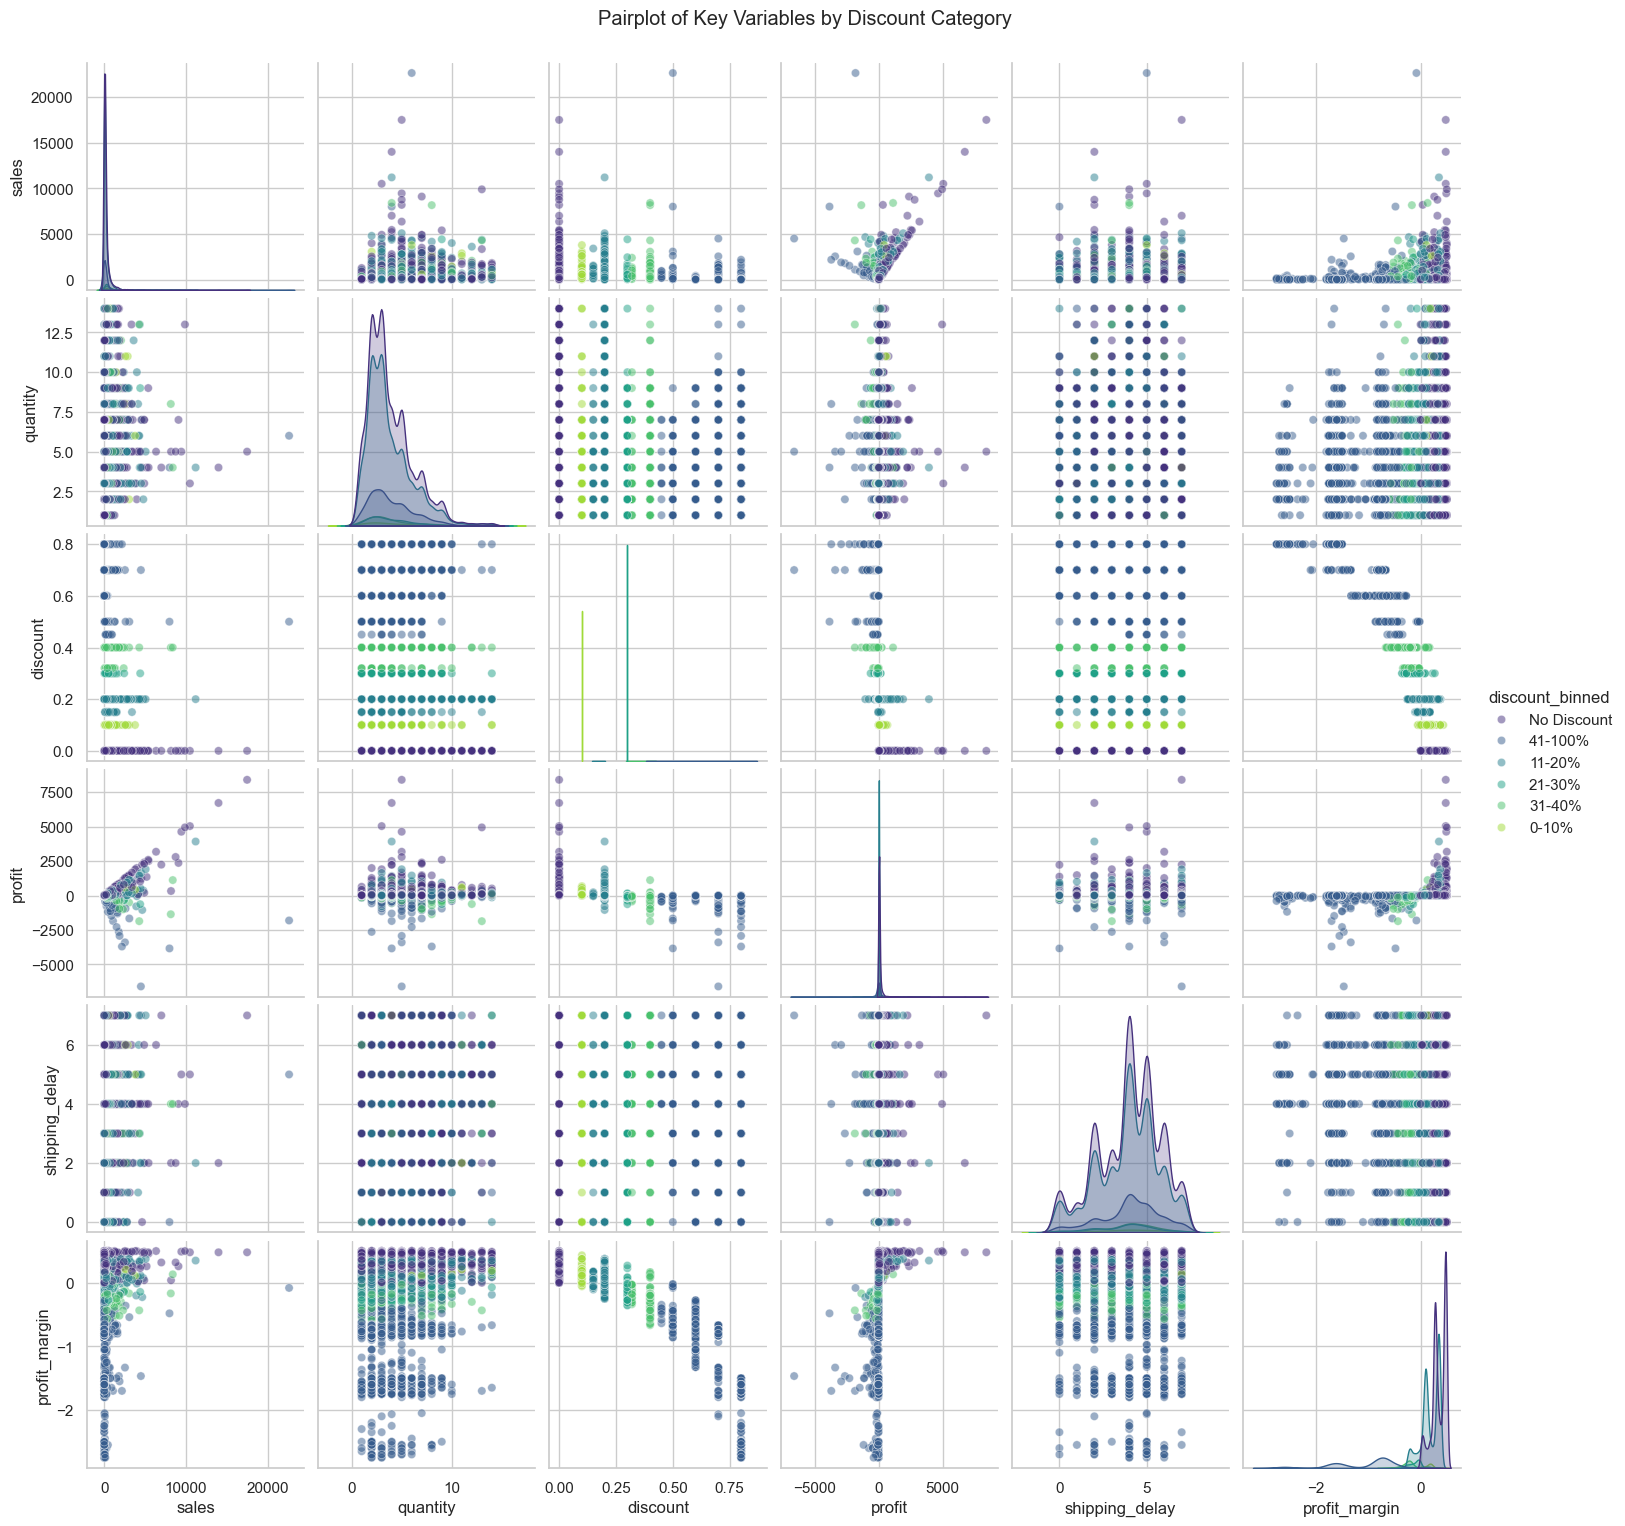

In [36]:
# Pairplot with discount_binned as hue
key_vars = ['sales', 'quantity', 'discount', 'profit', 'shipping_delay', 'profit_margin']
sns.pairplot(
    df[key_vars + ['discount_binned']], 
    diag_kind='kde', 
    hue='discount_binned', 
    palette='viridis',
    plot_kws={'alpha': 0.5}
)
plt.suptitle("Pairplot of Key Variables by Discount Category", y=1.02)
# Save the pairplot
plt.savefig(
    os.path.join("plots", "pairplot_discount_tiers.png"),  # Path + filename
    dpi=300,               # High resolution
    bbox_inches='tight'    # Prevent cropping titles
)
plt.show()

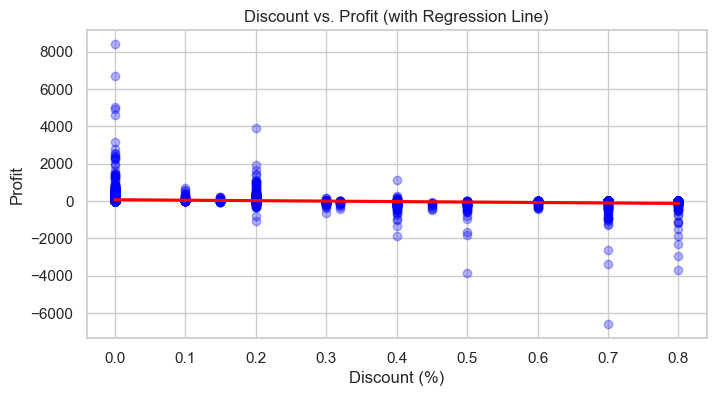

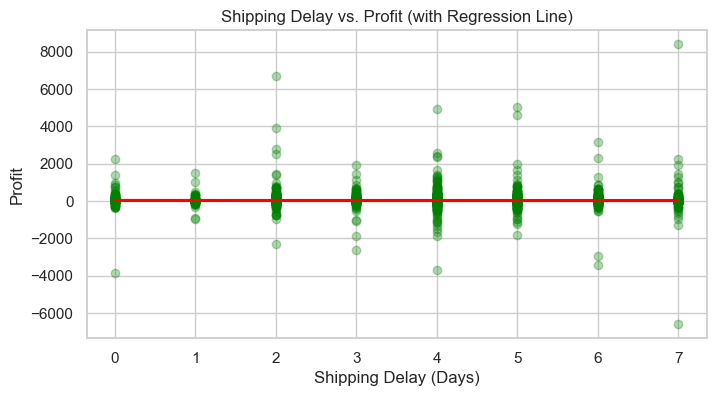

In [38]:
# Discount vs. Profit
plt.figure(figsize=(8, 4))
sns.regplot(
    x='discount', 
    y='profit', 
    data=df, 
    scatter_kws={'alpha': 0.3, 'color': 'blue'}, 
    line_kws={'color': 'red'}
)
plt.title("Discount vs. Profit (with Regression Line)")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
# Save the plot
plt.savefig(
    os.path.join("plots", "discount_vs_profit.png"),
    dpi=300,
    bbox_inches='tight'
)
plt.show()

# Shipping Delay vs. Profit
plt.figure(figsize=(8, 4))
sns.regplot(
    x='shipping_delay', 
    y='profit', 
    data=df, 
    scatter_kws={'alpha': 0.3, 'color': 'green'}, 
    line_kws={'color': 'red'}
)
plt.title("Shipping Delay vs. Profit (with Regression Line)")
plt.xlabel("Shipping Delay (Days)")
plt.ylabel("Profit")
plt.savefig(
    os.path.join("plots", "shipping delay_vs_profit.png"),
    dpi=300,
    bbox_inches='tight'
)
plt.show()

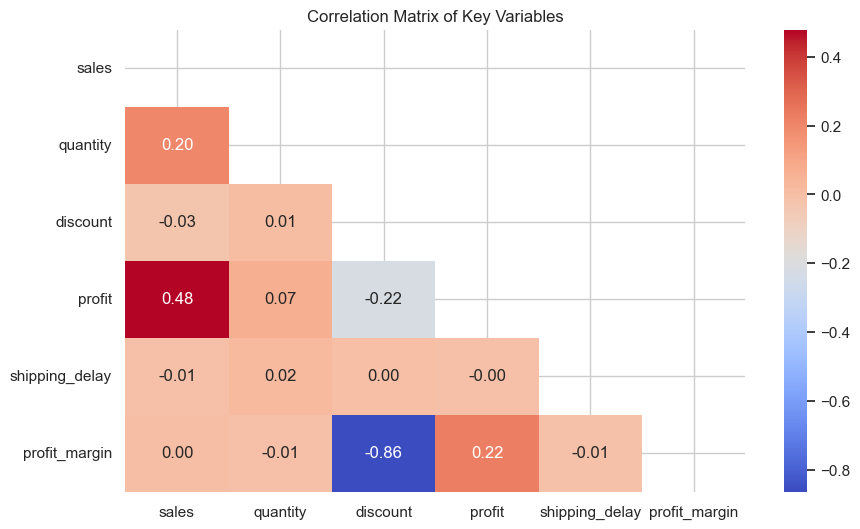

In [40]:
# Calculate correlations
corr = df[key_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    mask=np.triu(np.ones_like(corr, dtype=bool)))  # Hide upper triangle for clarity
plt.title("Correlation Matrix of Key Variables")
# Save the heatmap
plt.savefig(
    os.path.join("plots", "correlation_heatmap.png"),
    dpi=300,
    bbox_inches='tight'
)
plt.show()

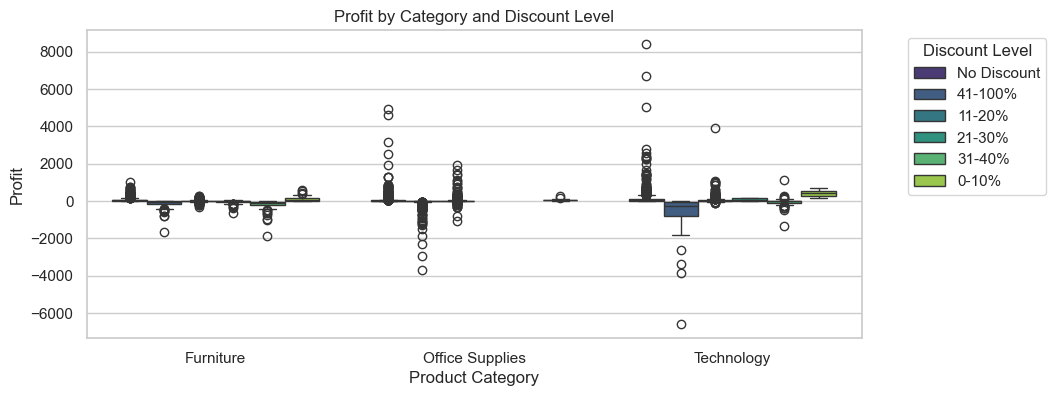

In [42]:
# Interaction between discount and category
plt.figure(figsize=(10, 4))
sns.boxplot(
    x='category', 
    y='profit', 
    hue='discount_binned', 
    data=df, 
    palette='viridis'
)
plt.title("Profit by Category and Discount Level")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.legend(title='Discount Level', bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the boxplot
plt.savefig(
    os.path.join("plots", "profit_by_category_discount.png"),
    dpi=300,
    bbox_inches='tight'
)
plt.show()


Regression Model Summary (Profit as Target):
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     355.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:41:16   Log-Likelihood:                -66811.
No. Observations:                9994   AIC:                         1.337e+05
Df Residuals:                    9980   BIC:                         1.338e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

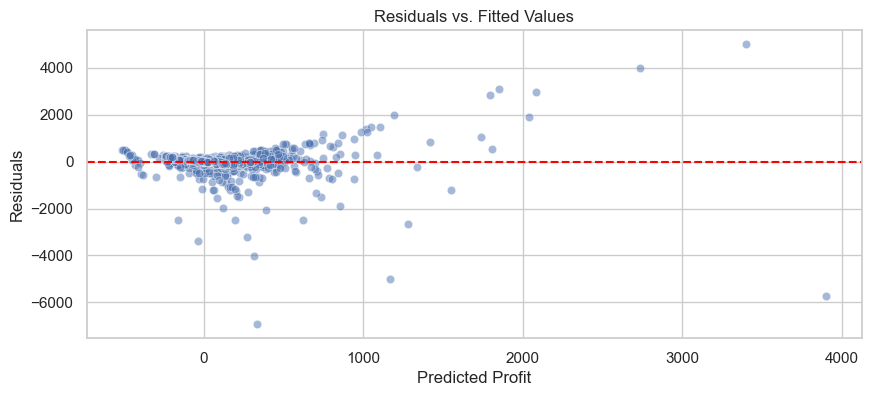

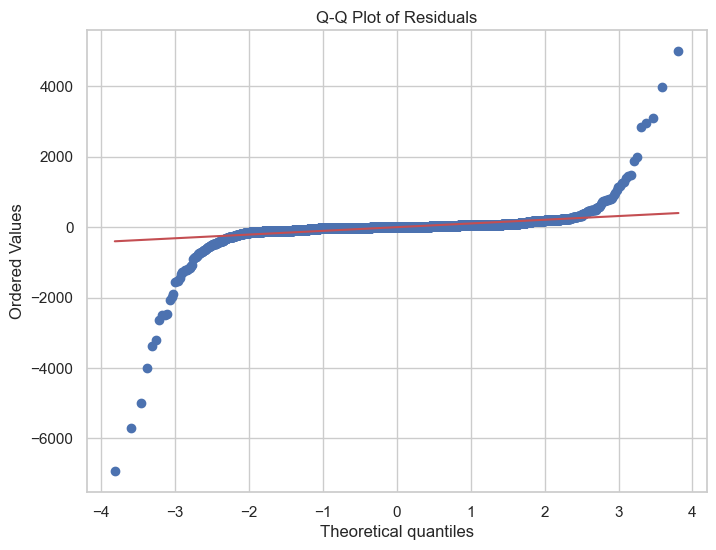

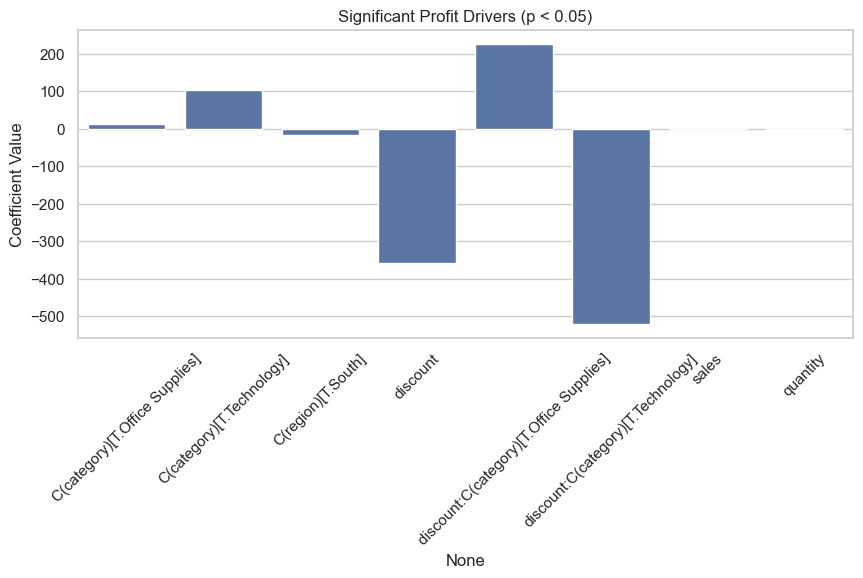


Interaction Effect for Technology:
Total discount impact = -878.24 (per 1% discount)


In [60]:
# =================================================================
# STEP 2: IMPROVED REGRESSION ANALYSIS (ADD BELOW YOUR EXISTING CODE)
# =================================================================
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Ensure categorical columns are strings (if not already)
df['category'] = df['category'].astype(str)
df['region'] = df['region'].astype(str)
df['segment'] = df['segment'].astype(str)

# 2. Define formula with patsy-compatible syntax
formula = '''
    profit ~ 
    discount * C(category) + 
    shipping_delay + 
    sales + 
    quantity + 
    C(region) + 
    C(segment)
'''

# 3. Fit model
model_profit = smf.ols(formula, data=df).fit()
print("\n" + "="*50)
print("Regression Model Summary (Profit as Target):")
print("="*50)
print(model_profit.summary())

# 4. Check multicollinearity
X = model_profit.model.exog  # Get design matrix
vif = pd.DataFrame()
vif["Variable"] = model_profit.model.exog_names
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("\nVIF > 5 (Potential Multicollinearity):")
print(vif[vif["VIF"] > 5])

# 5. Residual diagnostics
residuals = model_profit.resid

# Ensure the "plots" directory exists
os.makedirs("plots", exist_ok=True)

# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x=model_profit.fittedvalues, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.savefig(os.path.join("plots", "residuals_vs_fitted.png"), dpi=300, bbox_inches='tight')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.savefig(os.path.join("plots", "qq_plot.png"), dpi=300, bbox_inches='tight')
plt.show()

# 6. Plot significant coefficients (p < 0.05)
coefs = model_profit.params[1:]  # Skip intercept
p_values = model_profit.pvalues[1:]
significant_coefs = coefs[p_values < 0.05]

plt.figure(figsize=(10, 4))
sns.barplot(x=significant_coefs.index, y=significant_coefs.values)
plt.title("Significant Profit Drivers (p < 0.05)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.savefig(os.path.join("plots", "significant_coefficients.png"), dpi=300, bbox_inches='tight')
plt.show()

# 7. Interaction term interpretation
# Note: The interaction term coefficient names follow the pattern 'discount:C(category)[T.<level>]'
# For example, for Technology:
try:
    tech_discount_effect = (
        model_profit.params['discount'] + 
        model_profit.params['discount:C(category)[T.Technology]']
    )
    print(f"\nInteraction Effect for Technology:")
    print(f"Total discount impact = {tech_discount_effect:.2f} (per 1% discount)")
except KeyError:
    print("\nInteraction term for Technology not found. Check the category levels in your data.")

In [78]:
# Update the formula to exclude non-significant variables
formula_simplified = '''
    profit ~ 
    discount * C(category) + 
    sales + 
    quantity
'''

# Fit the simplified model
model_simplified = smf.ols(formula_simplified, data=df).fit()
print(model_simplified.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     658.6
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:17:53   Log-Likelihood:                -66815.
No. Observations:                9994   AIC:                         1.336e+05
Df Residuals:                    9986   BIC:                         1.337e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [80]:
# Center the "discount" and "sales" variables
df['discount_centered'] = df['discount'] - df['discount'].mean()
df['sales_centered'] = df['sales'] - df['sales'].mean()

# Update formula with centered variables
formula_centered = '''
    profit ~ 
    discount_centered * C(category) + 
    sales_centered + 
    quantity
'''

model_centered = smf.ols(formula_centered, data=df).fit()
print(model_centered.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     658.6
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:17:58   Log-Likelihood:                -66815.
No. Observations:                9994   AIC:                         1.336e+05
Df Residuals:                    9986   BIC:                         1.337e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [82]:
# Log-transform sales (add 1 to avoid log(0))
df['log_sales'] = np.log(df['sales'] + 1)

# Update formula
formula_log_sales = '''
    profit ~ 
    discount * C(category) + 
    log_sales + 
    quantity
'''

model_log_sales = smf.ols(formula_log_sales, data=df).fit()
print(model_log_sales.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     195.8
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          3.42e-273
Time:                        13:18:22   Log-Likelihood:                -68069.
No. Observations:                9994   AIC:                         1.362e+05
Df Residuals:                    9986   BIC:                         1.362e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------